# Project 6 Sales_Channel_Prediction Case Study
Aim --> To predict the right sales channel from the given data

In [71]:
#Lets Import the important libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Lets Load the data

In [72]:
data=pd.read_csv('salesdata.csv')
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


## Information about the data
-Unnamed is the id of a particular chanel

-TV is the advertising dollar spent on product marketing through Television 

-radio is the advertising dollar spent on sales through Radio

-newspaper is the advertising dollar spent on Newspaper

-sales is the sales of a product in the market

In [73]:
data=data.rename({'Unnamed: 0' : 'ID'},axis=1) 
data.head()

,ID,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


## Lets Check the null values

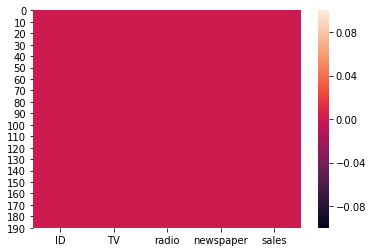

In [74]:
sns.heatmap(data.isnull())

In [75]:
data.isnull().sum()

ID           0
TV           0
radio        0
newspaper    0
sales        0
dtype: int64

so from the above we can see that there are no null values

## Statistical Summary

In [76]:
data.describe()

,ID,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


From the above we can see that difference between mean and max is very odd for newspaper

## Lets Check the correlation of the given data

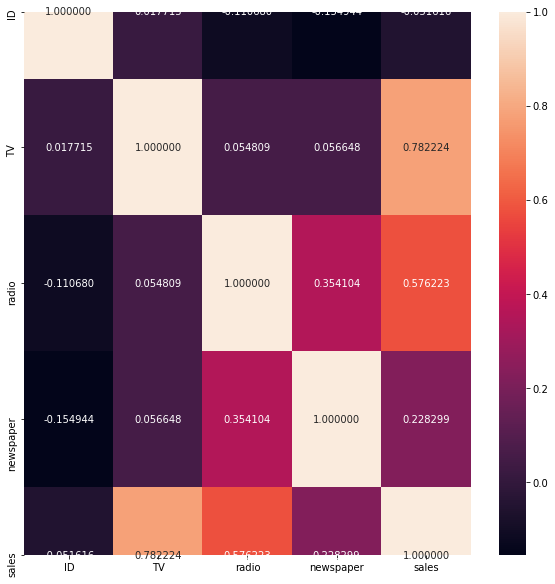

In [77]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,fmt="f")

From the above Graph we can see that we have positive correlation between our dependent variables and independent variables, however we have a negative correlation in ID column as it not an important variable.

In [79]:
#Lets Check the skewess
data.skew()

ID           0.000000
TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

In [80]:
#Lets treat the above skewness
for index in data.skew().index:
    if data.skew().loc[index]>0.5:
        data[index]=np.cbrt(data[index])

In [131]:
data.skew()

ID           0.000000
TV          -0.069853
radio        0.094175
newspaper   -0.265522
sales        0.407571
dtype: float64

From Above we can see that all the skewness of the data is below 0.5 so we can consider that skewness

## Lets do the EDA of given data

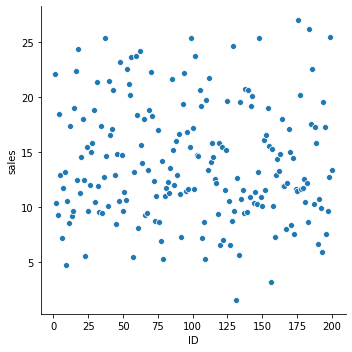

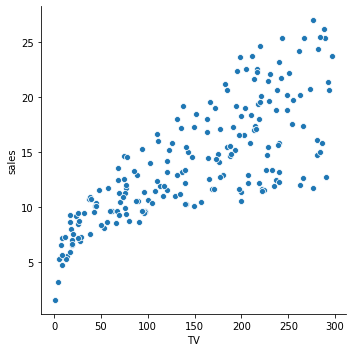

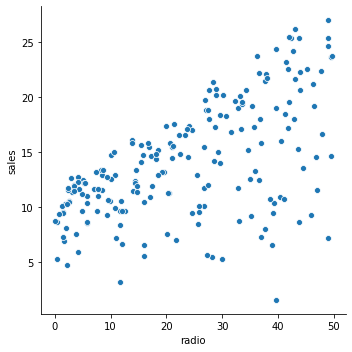

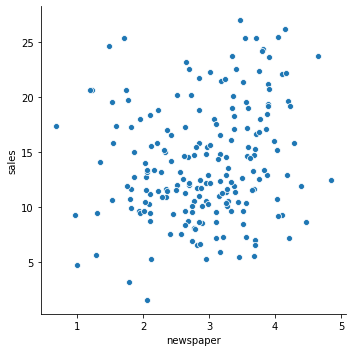

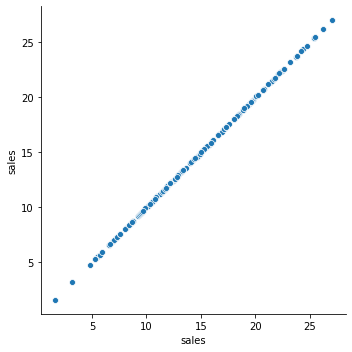

In [82]:
for col in data:
    sns.relplot(x=col,y='sales',data=data)
    plt.show()

From the above Graphs we can see that the TV and radio have a strong linear relationship with sales


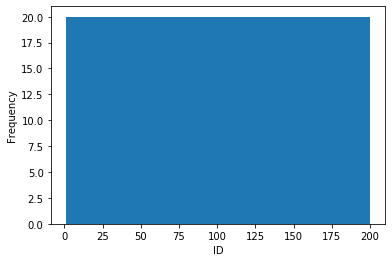

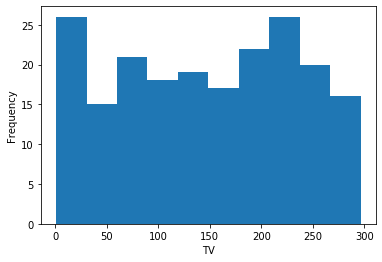

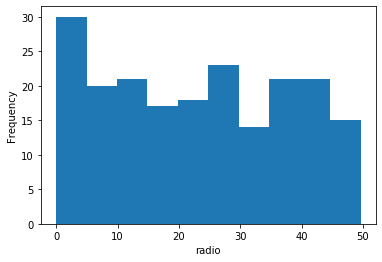

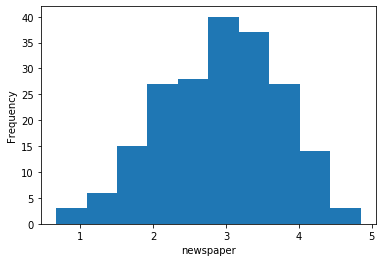

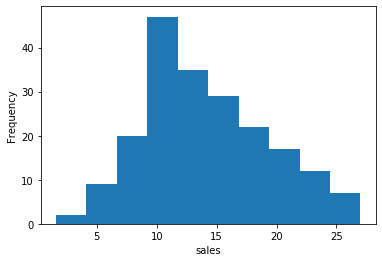

In [83]:
for col in data:
    data[col].plot.hist()
    plt.xlabel(col)
    plt.show()

From the above we can see that TV has most number of sales advertisment.

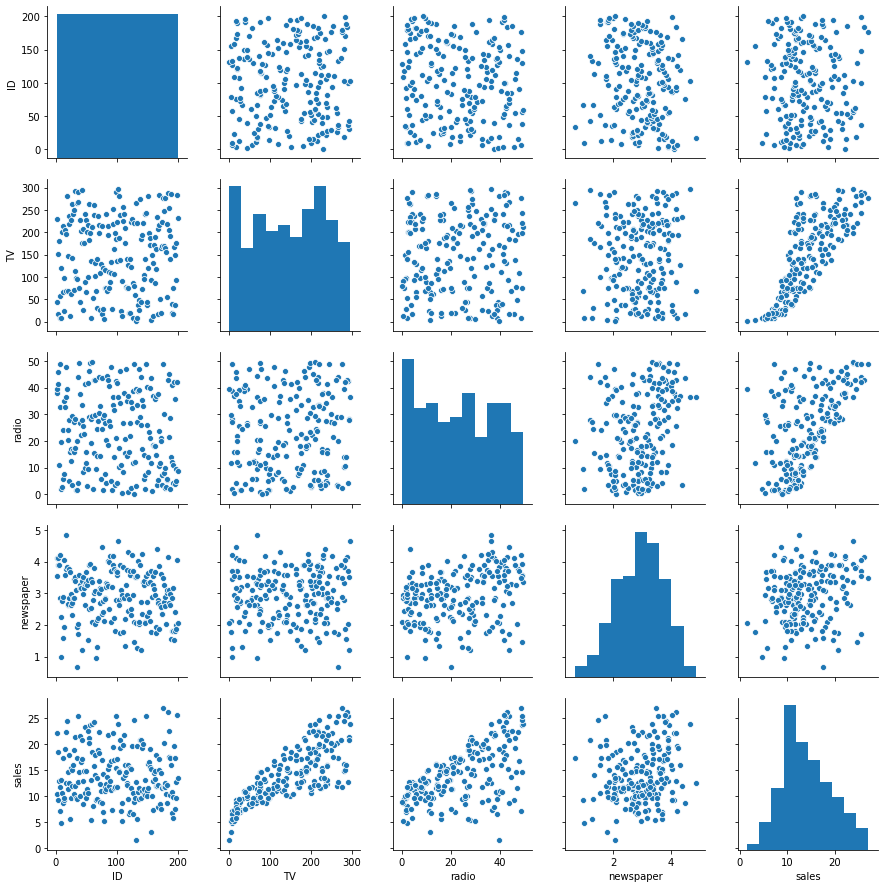

In [84]:
sns.pairplot(data)

## Lets split and scale the data

In [133]:
x=data.iloc[:,1:-1]
x.head()

,TV,radio,newspaper
0,230.1,37.8,4.105525
1,44.5,39.3,3.559526
2,17.2,45.9,4.107502
3,151.5,41.3,3.881968
4,180.8,10.8,3.879755


In [134]:
y=data['sales']
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [135]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [136]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.30,random_state=60)

In [137]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((140, 3), (60, 3), (140,), (60,))

## Implementing ML Algorithms

In [138]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import cross_val_score

In [139]:
LR=LinearRegression()
LA=Lasso()
RI=Ridge()
DTR=DecisionTreeRegressor(random_state=60)
KNR=KNeighborsRegressor()
ABR=AdaBoostRegressor(random_state=60)
RFR=RandomForestRegressor(random_state=60)
GBR=GradientBoostingRegressor(random_state=60)

In [140]:
models=[]
models.append(("LinearRegression",LR))
models.append(("Lasso",LA))
models.append(("Ridge",RI))
models.append(("DecisionTreeRegressor",DTR))
models.append(("AdaBoostRegressor",ABR))
models.append(("RandomForestRegressor",RFR))
models.append(("GradientBoostingRegressor",GBR))

In [141]:
Model=[]
R2_score=[]
cvs=[]
MSE=[]
MAE=[]
RMSE=[]
for name,model in models:
    print('-------------------------------------',name,'-------------------------------')
    print(model)
    Model.append(name)
    model.fit(x_train,y_train)
    pr=model.predict(x_test)
    r2=r2_score(y_test,pr)
    print('R2_score = ',r2)
    R2_score.append(r2)
    mse=mean_squared_error(y_test,pr)
    print("Mean_Squared_Error =",mse)
    MSE.append(mse)
    mae=mean_absolute_error(y_test,pr)
    print("Mean_Absolute_Error =",mae)
    MAE.append(mae)
    rmse=np.sqrt(mse)
    print("Root_Mean_Squared_Error =",rmse)
    RMSE.append(rmse)
    score= cross_val_score(model,x,y,cv=10,scoring='r2').mean()
    print('Cross_Val_Score = ',score)
    cvs.append(score)
    print('\n')

------------------------------------- LinearRegression -------------------------------
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
R2_score =  0.9213760797620633
Mean_Squared_Error = 2.2677975609742878
Mean_Absolute_Error = 1.1991622520085647
Root_Mean_Squared_Error = 1.5059208348961401
Cross_Val_Score =  0.8856868533734576


------------------------------------- Lasso -------------------------------
Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
R2_score =  0.8117761108741515
Mean_Squared_Error = 5.429056136922735
Mean_Absolute_Error = 1.7267695642255239
Root_Mean_Squared_Error = 2.330033505536505
Cross_Val_Score =  0.8148582392201715


------------------------------------- Ridge -------------------------------
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, rand

In [142]:
result = pd.DataFrame({'Model': Model, 'R2_score': R2_score ,'Mean_Squared_Error' :MSE,'Mean_Absolute_Error' :MAE,'Root_Mean_Squared_Error' :RMSE,'Cross_val_score':cvs})
result

,Model,R2_score,Mean_Squared_Error,Mean_Absolute_Error,Root_Mean_Squared_Error,Cross_val_score
0,LinearRegression,0.921376,2.267798,1.199162,1.505921,0.885687
1,Lasso,0.811776,5.429056,1.726770,2.330034,0.814858
2,Ridge,0.920609,2.289911,1.204761,1.513245,0.885799
3,DecisionTreeRegressor,0.913852,2.484833,1.148333,1.576335,0.952451
4,AdaBoostRegressor,0.941191,1.696256,1.010562,1.302404,0.957280
5,RandomForestRegressor,0.962031,1.095172,0.804500,1.046504,0.974250
6,GradientBoostingRegressor,0.978778,0.612133,0.631218,0.782389,0.981393


From the above dataframe we can see that the almost all algorithms are working well giving more than 90% but we will chose GradientBoostingRegressor as our final model as it as Highest R2 score and lowest mean absolute error.

R2_score=0.978778

Mean_Squared_Error=0.612133

Mean_Absolute_Error=0.631218

Root_Mean_Squared_Error=0.782389

Cross_Val_score=0.981393

However tunned random_state from 45, 55, 60, 65. However got the best result in random_state=60.

## Dumping the Best Model and predicting from it.

In [127]:
from sklearn.externals import joblib

In [128]:
joblib.dump(GBR,'model_Channel_Sales.obj')

['model_Channel_Sales.obj']

In [129]:
model=joblib.load('model_Channel_Sales.obj')

In [130]:
model.predict(x_test)

array([14.20695781, 22.22457247, 11.6201306 , 20.10257798, 16.256105  ,
       21.5633964 , 21.66768895, 12.42120095, 15.29623314,  5.50207374,
       10.63211173,  7.56008979, 17.71662846,  6.76457079, 10.83792388,
       17.88598333, 12.2068498 , 10.14667097,  6.70956194, 10.20633876,
       25.05593745,  9.0462529 , 13.12516675, 17.80266901, 11.70565323,
       15.02380007, 13.43922795, 10.99025077,  6.88186915,  3.97886094,
       14.06756915, 15.29113982, 15.48088204, 21.67268267, 22.64312621,
       16.07326584, 14.10611541,  7.02363163, 12.95550351,  8.07570681,
       15.16744128, 10.6356817 , 19.54182947, 21.93920057, 10.65830103,
       16.94210653, 19.80955251, 18.00294704,  9.39357325, 14.41433835,
       19.72426549, 14.0655252 , 16.0450347 , 14.74106105, 15.67762585,
       25.07666722, 17.39191272,  9.77839099, 14.78012016, 25.72248887])